# Which Star Wars Movie is Unequivocally the Best?

![](https://i.pinimg.com/originals/84/da/da/84dada0a5dcfd790700df3dd87897aef.gif)

#### Overview:

An opinion poll team, [FiveThirtyEight](https://en.wikipedia.org/wiki/FiveThirtyEight), asked the question, **Does the rest of America realize that "The Empire Strikes Back" is clearly the best of the bunch?** In order to answer this question the team created a survey from SurveyMonkey which received 835 responses total. You can download from [their github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

With the data we're analyzing there are several columns containing answers to single questions about *Star Wars* movies. Meaning that for some questions the respondent had to check one or more boxes. Because of these the formatting of our data is a bit strange so there is going to be a lot of data restructuring in this project.

#### Data Dictionary:

 - `RespondentID` - An anonymized ID for the respondent (person taking the survey)
 - `Gender` - the respondent's gender
 - `Age` - the respondent's age
 - `Household Income` -  the respondent's income
 - `Education` - the respondent's education level
 - `Location (Census Region)` - the respondent's location
 - `Have you seen any of the 6 films in the Star Wars franchise?` - a Yes or No response
 - `Do you consider yourself to be a fan of the Star Wars film franchise?` - a Yes or No response
 
#### Summary of Results:

- `The Empire Strikes Back (Ep. 5)` is the highest rated and most viewed across the board
- `Revenge of the Sith (Ep. 3)` is the leasted rated and leasted viewed across the board
- Every Star Wars movie had approximately 70 more males than females watch said film


## Read in Data & Explore

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in data
star_wars = pd.read_csv(r'C:\Users\david\Desktop\Work Data\Unpackaged\Star Wars Data.csv', encoding='ISO-8859-1')
star_wars

# Pandas configuration
pd.set_option('display.max_columns', None)

# Rename columns to increase readability
star_wars.columns = star_wars.columns.str.lower()
star_wars.rename(columns={'respondentid':'respondent_id'})

# Display first five rows
star_wars.head()

,respondentid,have you seen any of the 6 films in the star wars franchise?,do you consider yourself to be a fan of the star wars film franchise?,which of the following star wars films have you seen? please select all that apply.,unnamed: 4,unnamed: 5,unnamed: 6,unnamed: 7,unnamed: 8,please rank the star wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,unnamed: 14,"please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,which character shot first?,are you familiar with the expanded universe?,do you consider yourself to be a fan of the expanded universe?,do you consider yourself to be a fan of the star trek franchise?,gender,age,household income,education,location (census region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   respondentid                                                                                                                                   1186 non-null   int64  
 1   have you seen any of the 6 films in the star wars franchise?                                                                                   1186 non-null   object 
 2   do you consider yourself to be a fan of the star wars film franchise?                                                                          836 non-null    object 
 3   which of the following star 

In [3]:
star_wars['have you seen any of the 6 films in the star wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: have you seen any of the 6 films in the star wars franchise?, dtype: int64

In [4]:
star_wars['do you consider yourself to be a fan of the star wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: do you consider yourself to be a fan of the star wars film franchise?, dtype: int64

[Text(0.5, 1.0, 'Missing Data')]

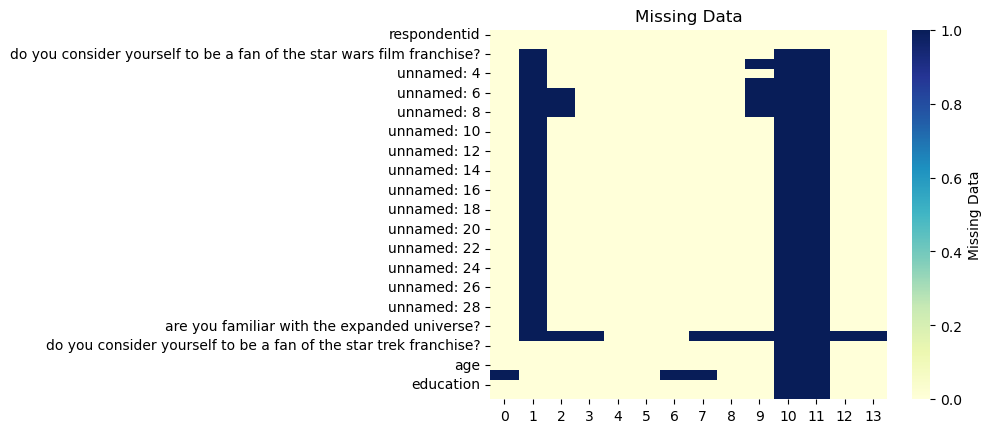

In [5]:
# Generate heat map of NA values for our dataset
sns.heatmap(star_wars[0:14].isna().transpose(),
           cmap='YlGnBu',
           cbar_kws={'label': 'Missing Data'}).set(title='Missing Data')

## Cleaning Data: Converting to Boolean l

Now we'll convert the strings "Yes" and "No" for the columns `Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` into boolean values of `True` and `False`. Doing this will allow us to manipulate the data for analysis later.

In [6]:
# Change all specificed strings to specificed boolean value
yes_no = {'Yes':True, 'No':False}

star_wars['have you seen any of the 6 films in the star wars franchise?'] = star_wars['have you seen any of the 6 films in the star wars franchise?'].map(yes_no)
star_wars['do you consider yourself to be a fan of the star wars film franchise?'] = star_wars['do you consider yourself to be a fan of the star wars film franchise?'].map(yes_no)

# Check our work
star_wars[['have you seen any of the 6 films in the star wars franchise?', 'do you consider yourself to be a fan of the star wars film franchise?']]

,have you seen any of the 6 films in the star wars franchise?,do you consider yourself to be a fan of the star wars film franchise?
0,True,True
1,False,NaN
2,True,False
3,True,True
4,True,True
...,...,...
1181,True,True
1182,True,True
1183,False,NaN
1184,True,True


## Cleaning Data:  Renaming Columns l

Furthermore we're going to rename the columns: `Which of the following Star Wars films have you seen? Please select all that apply.`, `Unnamed: 4`, `Unnamed: 5`, `Unnamed:6`, `Unnamed: 7`, and `Unnamed:8` to something more intuitive. These columns indiciate whether or not the respondent has seen the corresponding movie.

In [7]:
# Rename columns
star_wars = star_wars.rename(columns={
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_mov_1',
    'Unnamed: 4':'seen_mov_2',
    'Unnamed: 5':'seen_mov_3',
    'Unnamed: 6':'seen_mov_4',
    'Unnamed: 7':'seen_mov_5',
    'Unnamed: 8':'seen_mov_6'})

# Check to see if it worked
print(star_wars.columns[3:9])
star_wars.head()

Index(['which of the following star wars films have you seen? please select all that apply.',
       'unnamed: 4', 'unnamed: 5', 'unnamed: 6', 'unnamed: 7', 'unnamed: 8'],
      dtype='object')


,respondentid,have you seen any of the 6 films in the star wars franchise?,do you consider yourself to be a fan of the star wars film franchise?,which of the following star wars films have you seen? please select all that apply.,unnamed: 4,unnamed: 5,unnamed: 6,unnamed: 7,unnamed: 8,please rank the star wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,unnamed: 14,"please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,which character shot first?,are you familiar with the expanded universe?,do you consider yourself to be a fan of the expanded universe?,do you consider yourself to be a fan of the star trek franchise?,gender,age,household income,education,location (census region)
0,3292879998,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Data: Converting to Boolean ll

For the columns we just renamed (`seen_ep_1,`, `seen_ep_2`, `seen_ep_3`, `seen_ep_4`, `seen_ep_5`, and `seen_ep_6`) if the respondent indicated that they have watched the movie then the movie name is entered as a string, if they respondent indicated that they have not seen the movie then then a `NaN` value will be present. 

Just like before we're going to convert the values of the renamed column to boolean values. `True` will indicate that the user has seen the movie and `False` indicates the user has not seen the movie.

In [8]:
# Some of the strings in our rows have double spaces, so we'll transform them to single spaces
star_wars = star_wars.replace(r'\s+', ' ', regex=True)

# Map string values to boolean values using for loop
movies_map = {
    'Star Wars: Episode I The Phantom Menace': True,
    np.nan:False,
    'Star Wars: Episode II Attack of the Clones':True,
    'Star Wars: Episode III Revenge of the Sith':True,
    'Star Wars: Episode IV A New Hope':True,
    'Star Wars: Episode V The Empire Strikes Back':True,
    'Star Wars: Episode VI Return of the Jedi':True
    }
    
for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movies_map) 

star_wars.head()

,respondentid,have you seen any of the 6 films in the star wars franchise?,do you consider yourself to be a fan of the star wars film franchise?,which of the following star wars films have you seen? please select all that apply.,unnamed: 4,unnamed: 5,unnamed: 6,unnamed: 7,unnamed: 8,please rank the star wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,unnamed: 14,"please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,which character shot first?,are you familiar with the expanded universe?,do you consider yourself to be a fan of the expanded universe?,do you consider yourself to be a fan of the star trek franchise?,gender,age,household income,education,location (census region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## Cleaning Data: Renaming Columns ll

For the columns `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.`, `Unnamed: 10`, `Unnamed: 11`, `Unnamed:12`, `Unnamed: 13`, and `Unnamed: 14` we are going to rename these. The first column here indiciates how much a respondent enjoyed the movie, with 1 being the most liked movie and 6 being the least liked movie.

After that we're going to convert the values in these columns into floats instead of strings.

Lastly we're going to invert the values of the data, so that if a respondeent rated one of the movies as a 2 it will become a 5.0. Meaning that the higher the number the more the respondeent liked the movie. We are doing this because graphical representations of an individuals likeness of something usually follows the convention of a higher number for a greater likeness.

In [9]:
dvg = star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=True)

In [10]:
# Rename Columns
star_wars = star_wars.rename(columns={
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'movie_1_score',
    'Unnamed: 10':'movie_2_score',
    'Unnamed: 11':'movie_3_score',
    'Unnamed: 12':'movie_4_score',
    'Unnamed: 13':'movie_5_score',
    'Unnamed: 14':'movie_6_score'
    })

# Convert values to floats
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Invert values
values_map = {
    1.0:6.0,
    2.0:5.0,
    3.0:4.0,
    4.0:3.0,
    5.0:2.0,
    6.0:1.0
}

for col in star_wars.columns[9:15]:
    star_wars[col] = star_wars[col].map(values_map)

# Check our work
star_wars.head()

,respondentid,have you seen any of the 6 films in the star wars franchise?,do you consider yourself to be a fan of the star wars film franchise?,which of the following star wars films have you seen? please select all that apply.,unnamed: 4,unnamed: 5,unnamed: 6,unnamed: 7,unnamed: 8,please rank the star wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,unnamed: 14,"please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",unnamed: 16,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24,unnamed: 25,unnamed: 26,unnamed: 27,unnamed: 28,which character shot first?,are you familiar with the expanded universe?,do you consider yourself to be a fan of the expanded universe?,do you consider yourself to be a fan of the star trek franchise?,gender,age,household income,education,location (census region)
0,3292879998,True,True,True,True,True,True,True,True,4.0,5.0,6.0,3.0,2.0,1.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,True,False,True,True,True,False,False,False,6.0,5.0,4.0,3.0,2.0,1.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,True,True,True,True,True,True,True,True,2.0,1.0,6.0,5.0,3.0,4.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,2.0,3.0,1.0,5.0,6.0,4.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Analysis

Now that our data has been cleaned we can analyze and find connections. 

##  Average Rating

First thing we'll do is find the average rating of each movie.

In [11]:
star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=False)

unnamed: 13                                                                                                                                      4.486842
unnamed: 14                                                                                                                                      3.952153
unnamed: 12                                                                                                                                      3.727273
please rank the star wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.    3.267066
unnamed: 10                                                                                                                                      2.912679
unnamed: 11                                                                                                                                      2.658683
dtype: float64

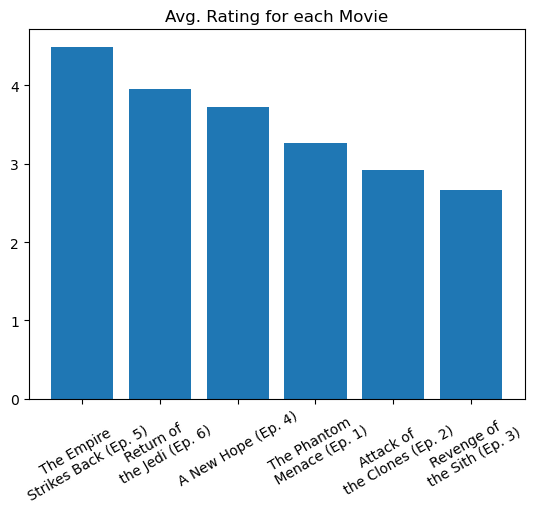

In [12]:
# Plot average score rating for each episode
plt.bar(range(6), star_wars[star_wars.columns[9:15]].mean().sort_values(ascending=False))
plt.xticks(ticks=range(6), labels=['The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)', 
                                   'A New Hope (Ep. 4)', 'The Phantom \n Menace (Ep. 1)',
                                   'Attack of \n the Clones (Ep. 2)',
                                   'Revenge of \n the Sith (Ep. 3) ', 
                                  ], rotation=30)
plt.title('Avg. Rating for each Movie')
plt.show()

We can see that episode 5, or The Empire Strikes Back, was the highest rated movie. This is most likely due to the nostalgia of it as it was [one of the first](https://www.disney.com.au/movies/a-star-wars-timeline-of-every-movie-in-order-of-release#:~:text=Star%20Wars%3A%20A%20New%20Hope,the%20desert%20planet%20of%20Tatooine.) Star Wars movies produced.

## Number of Times Each Movies was Watched

In [13]:
# Total number of times each movie was watched
star_wars[star_wars.columns[3:9]].sum().sort_values(ascending=False)

unnamed: 7                                                                             758
unnamed: 8                                                                             738
which of the following star wars films have you seen? please select all that apply.    673
unnamed: 6                                                                             607
unnamed: 4                                                                             571
unnamed: 5                                                                             550
dtype: int64

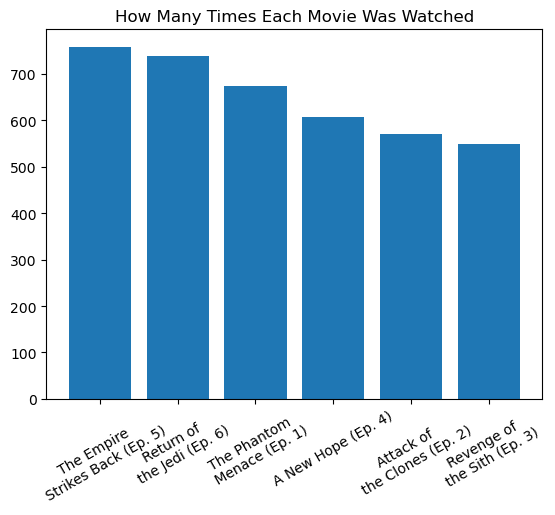

In [14]:
# Plot the total number of times each movie was watched
plt.bar(range(6), star_wars[star_wars.columns[3:9]].sum().sort_values(ascending=False))
plt.xticks(range(6), labels=['The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)', 
                            'The Phantom \n Menace (Ep. 1)', 'A New Hope (Ep. 4)', 
                            'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 
                            ], rotation=30)
plt.title('How Many Times Each Movie Was Watched')
plt.show()

We can see that The Empire Strikes Back is the most viewed movie ontop of being the top rated movie. After doing some surface level research it seems to be due to the [emotional investment between the audience and the characters, where the film left the audience on the edge while the next movie was produced](https://the-take.com/read/why-is-empire-strikes-back-considered-the-best-of-the-original-trilogy#:~:text=Empire%20weaves%20a%20profound%20emotional,the%20Star%20Wars%20universe%20right.).

## Analyzing Data Based on Gender

Let's move into a more selective analysis of our data. Let's look at the average rating and total number of views based off of gender.

In [15]:
# Create two dataframes based off of gender
males = star_wars[star_wars["gender"] == "Male"]
females = star_wars[star_wars["gender"] == "Female"]

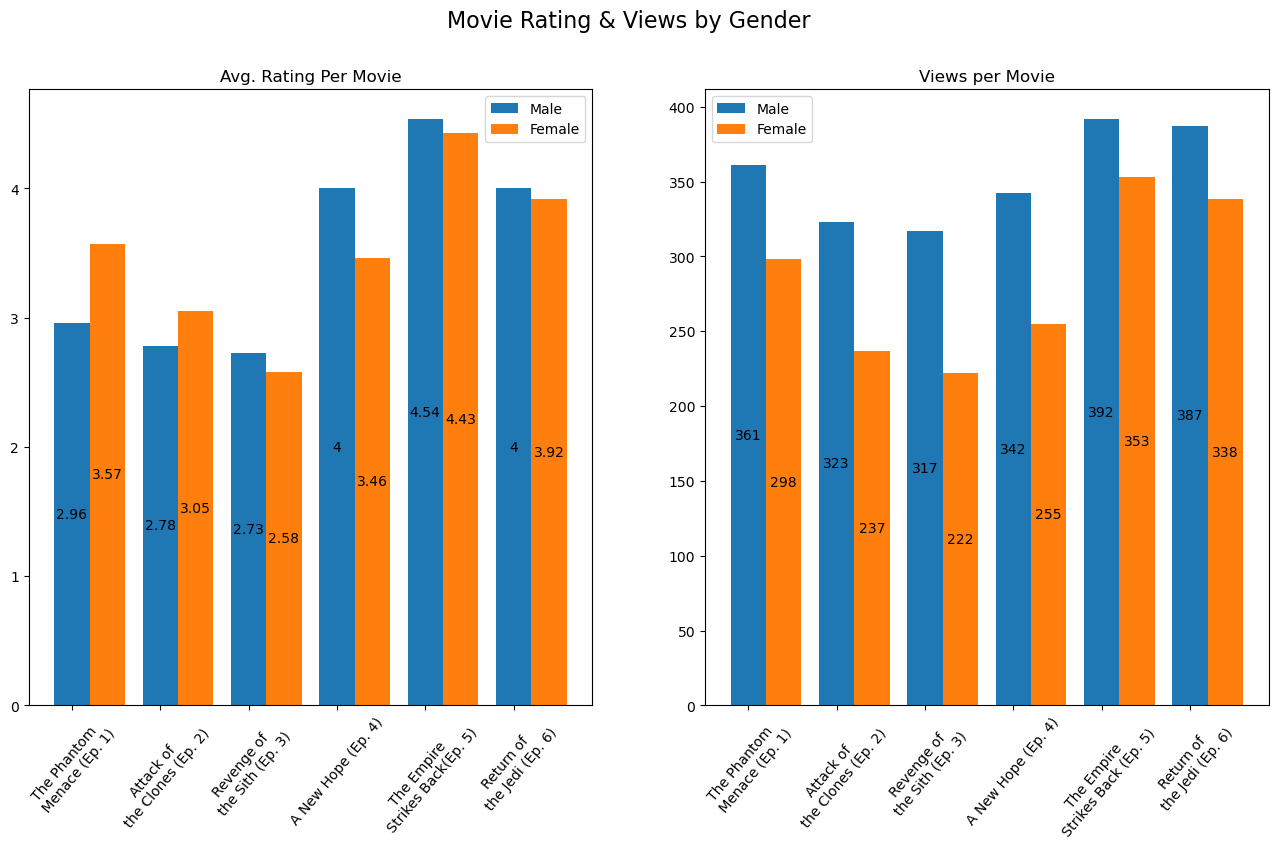

In [16]:
plt.figure(figsize=(16, 8))
plt.suptitle('Movie Rating & Views by Gender', fontsize=16)

# Avg. Rating Per Movie Graph
a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, males[males.columns[9:15]].mean().round(2), label='Male', width=y)
p2 = plt.bar(a + y, females[females.columns[9:15]].mean().round(2), label='Female', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back(Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

# Views Per Movie Graph
z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, males[males.columns[3:9]].sum(), label='Male', width=y)
p4 = plt.bar(z + y, females[females.columns[3:9]].sum(), label='Female', width=y)
plt.legend()
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

In [17]:
# Avg difference between number of male and female views for the Star Wars films
(males[males.columns[3:9]].sum() - females[females.columns[3:9]].sum()).mean()

69.83333333333333

From the above graphs we can see a couple of trends, mainly that males viewed every single movie *more* than females (with the average gap between the two being approximately 70). Yet females rated some of the movies higher than the males such as `The Phantom Menace (Ep. 1)` and `Attack of the Clones (Ep. 2)`. Additionally we can see that both `The Empire Strikes Back (Ep. 5)` and `Return of the Jedi (Ep. 6)` were viewed nearly the same number of times yet `The Empire Strikes Back (Ep. 5)` recieved higher ratings. This could be due to the emotional investment in `The Empire Strikes Back (Ep. 5)` [I touched upon earlier](https://the-take.com/read/why-is-empire-strikes-back-considered-the-best-of-the-original-trilogy#:~:text=Empire%20weaves%20a%20profound%20emotional,the%20Star%20Wars%20universe%20right.).

Let's look at the average rating per movie and views per movie based on whether or not the respondeent is a fan of the Star Wars franchise.

## Analyizing Data Based on Whether or not Respondeent is a Star Wars Fan

In [18]:
# Create two dataframes based off of whether or not respondeent is a Star Wars fan
is_starwars_fan = star_wars[star_wars['do you consider yourself to be a fan of the star wars film franchise?'] == True]
isnot_starwars_fan = star_wars[star_wars['do you consider yourself to be a fan of the star wars film franchise?'] == False]

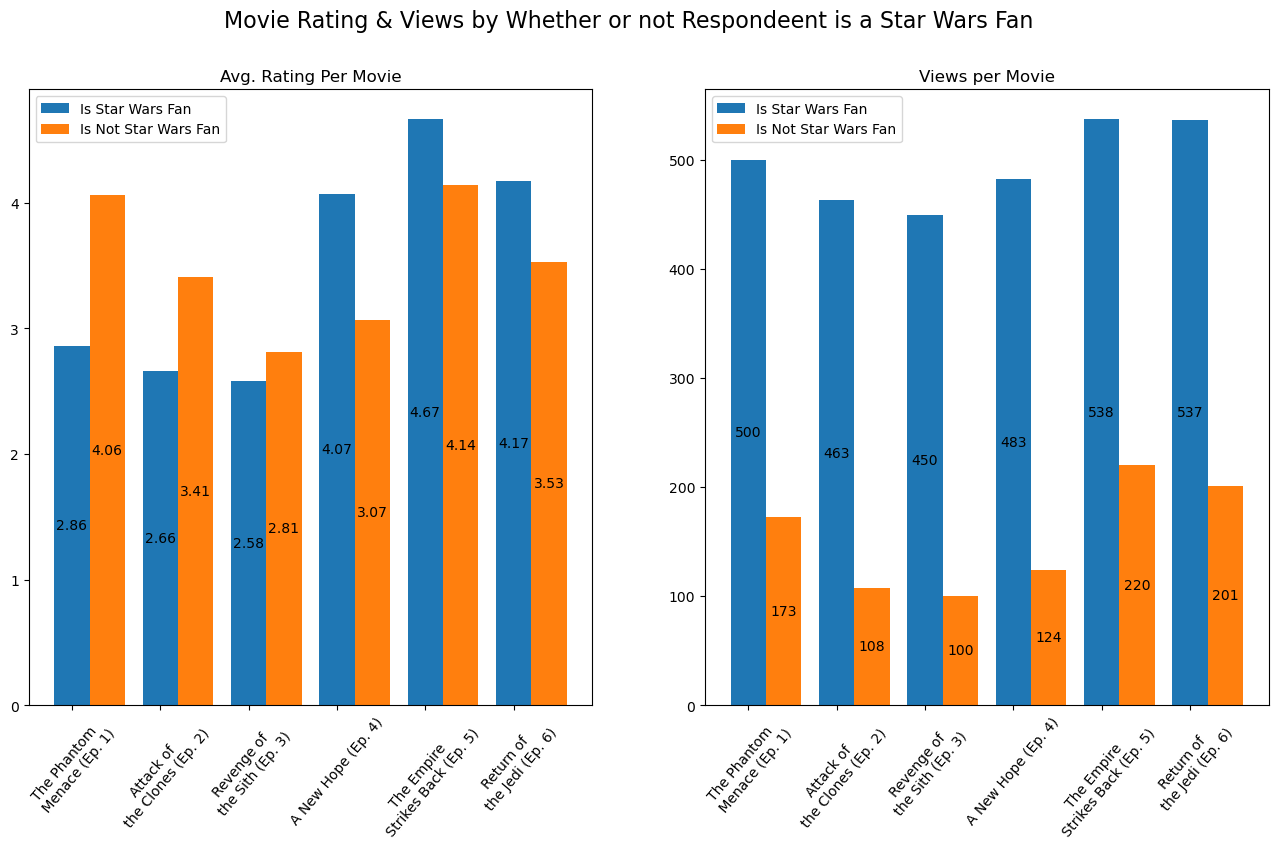

In [19]:
plt.figure(figsize=(16, 8))
plt.suptitle('Movie Rating & Views by Whether or not Respondeent is a Star Wars Fan', fontsize=16)

# Avg. Rating Per Movie Graph
a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, is_starwars_fan[is_starwars_fan.columns[9:15]].mean().round(2), label='Is Star Wars Fan', width=y)
p2 = plt.bar(a + y, isnot_starwars_fan[isnot_starwars_fan.columns[9:15]].mean().round(2), label='Is Not Star Wars Fan', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

# Views Per Movie Graph
z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, is_starwars_fan[is_starwars_fan.columns[3:9]].sum(), label='Is Star Wars Fan', width=y)
p4 = plt.bar(z + y, isnot_starwars_fan[isnot_starwars_fan.columns[3:9]].sum(), label='Is Not Star Wars Fan', width=y)
plt.legend()
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

Immediately we can see a very large majority of the respondeents that watched the Star Wars movies were fans which would make senses. You would expect the most people who are watching franchise films to be fans, especially with a franchise as big as Star Wars. 

An interesting observation is the average rating between fans and non fans for `The Phantom Menace (Ep. 1)` and `Attack of the Clones (Ep. 2)`. This could be a good area to explore to find out if the movie had some large lore inaccuracy that angered Star Wars fans while the non-Star Wars fans did not notice.

Let's look at movie ratings and view based on whether or not the respondeent is a Star Trek Fan.

## Analyizing Data Based on Whether or not Respondeent is a Star Trek Fan

In [20]:
# Create two dataframes based off of whether or not respondeent is a Star Trek fan
is_startrek_fan = star_wars[star_wars['do you consider yourself to be a fan of the star trek franchise?'] == 'Yes']
isnot_startrek_fan = star_wars[star_wars['do you consider yourself to be a fan of the star trek franchise?'] == 'No']

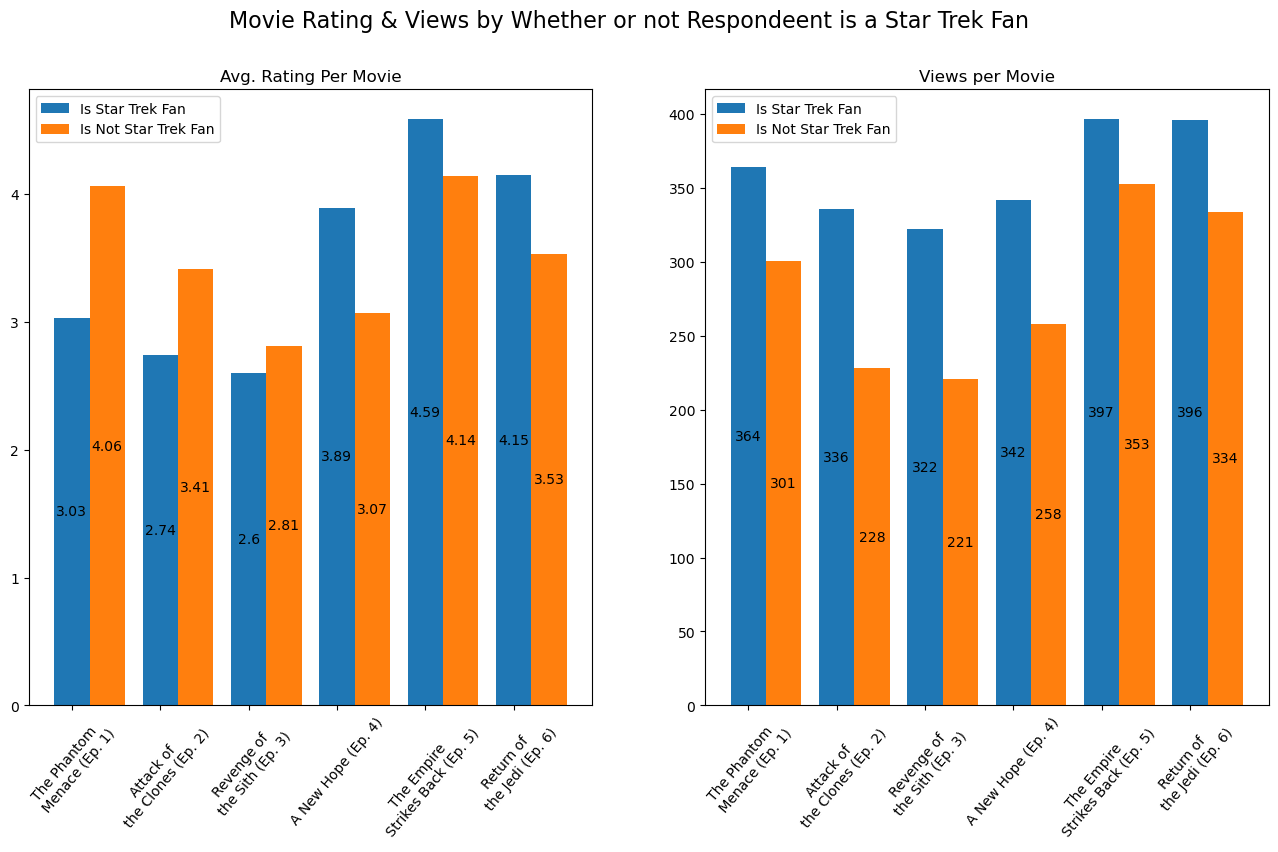

In [21]:
plt.figure(figsize=(16, 8))
plt.suptitle('Movie Rating & Views by Whether or not Respondeent is a Star Trek Fan', fontsize=16)

# Avg. Rating Per Movie Graph
a = np.arange(len(males.columns[9:15]))
y = 0.4

plt.subplot(1,2,1)
p1 = plt.bar(a, is_startrek_fan[is_startrek_fan.columns[9:15]].mean().round(2), label='Is Star Trek Fan', width=y)
p2 = plt.bar(a + y, isnot_starwars_fan[isnot_starwars_fan.columns[9:15]].mean().round(2), label='Is Not Star Trek Fan', width=y)
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Avg. Rating Per Movie')
plt.legend()

plt.bar_label(p1, label_type='center')
plt.bar_label(p2, label_type='center')

# Views Per Movie Graph
z = np.arange(len(females.columns[3:9]))

plt.subplot(1,2,2)
p3 = plt.bar(z, is_startrek_fan[is_startrek_fan.columns[3:9]].sum(), label='Is Star Trek Fan', width=y)
p4 = plt.bar(z + y, isnot_startrek_fan[isnot_startrek_fan.columns[3:9]].sum(), label='Is Not Star Trek Fan', width=y)
plt.legend()
plt.xticks(range(6), labels=['The Phantom \n Menace (Ep. 1)', 'Attack of \n the Clones (Ep. 2)',
                            'Revenge of \n the Sith (Ep. 3) ', 'A New Hope (Ep. 4)',
                            'The Empire \n Strikes Back (Ep. 5)', 'Return of \n the Jedi (Ep. 6)'
                            ], rotation=50)
plt.title('Views per Movie')

plt.bar_label(p3, label_type='center')
plt.bar_label(p4, label_type='center')

plt.show()

Looking at the movie ratings for Star Trek and Star Wars fans and non-fans shows that `The Phantom Menace (Ep. 1)`, `Attack of the Clones (Ep. 2)`, and `Revenge of the Sith (Ep. 3)` were all rated higher by non-fans of both film franchises where `A New Hope (Ep. 4)`, `The Empire Trikes Back (Ep. 5)`, and `Return of the Jedi (Ep. 6)` were rated higher by both Star Wars and Star Fans.

Additionally, we can see that there is a higher view count is associated with Star Trek fans with all six movies compared to non-fans. This is true for not only Star Trek fans but Star Wars fans. Therefore it is safe to say that fans of Star Wars and Star Trek are more likely to watch future Star Wars movies and perhaps even other sci fi films similar to Star Wars and Star Trek.

# Conclusion

`The Empire Strikes Back (Ep. 5)` is the highest rated **and** most viewed movie across all the groups we analyzed (Gender, Star Wars fans, Star Trek fans) while `Revenge of the Sith (Ep. 3)` is the lowest rated **and** least viewed across all the same groups.

Additionally, the first three Star Wars movies are all rated higher by non-Star Wars and non-Star Trek fans, while the last three are all rated higher by fans of both franchises.

Lastly, every Star Wars movie was viewed more by males than females, with the average viewing difference being approximately 70. I.e. There were 70 more males that watched each movie compared to females.